In [11]:
import numpy as np
x = np.load('train/sphere/10.npy')
x = x.squeeze(0)

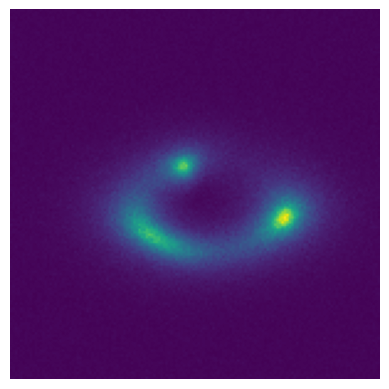

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x)  # Use cmap='gray' for grayscale images
plt.axis('off')  # Optional: Remove axes for better visualization
plt.show()

In [22]:
import os
def load_data_and_labels():
    x = []
    y = []

    # Assign labels to each class
    labels = {"no": 0, "sphere": 1, "vort": 2}

    for class_dir, label in labels.items():
        npy_files = os.listdir("train/{}".format(class_dir))  # List all files in the class directory
        for file in npy_files:
            file_path = os.path.join("train/{}".format(class_dir), file)
            data = np.load(file_path)
            x.append(data)
            y.append(label)

    return np.array(x), np.array(y)

# Assuming 'dataset_path' is the path to your 'dataset' directory
# class_dirs = {"train/no": 0, "train/sphere": 1, "train/vort": 2}
x, y = load_data_and_labels()




In [25]:
# import pickle

# with open('train.pkl', 'wb') as f:
#     pickle.dump((x, y), f)

In [10]:
import pickle
with open('train.pkl', 'rb') as f:
    x, y = pickle.load(f)

print(x.shape, y.shape)  # (number_of_samples, height, width) (number_of_samples,)

(30000, 1, 150, 150) (30000,)


In [18]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=3)

In [12]:
import numpy as np

# Reshape X_train to the correct shape and duplicate the grayscale channel across 3 channels
X_train_rgb = np.repeat(x, 3, axis=1)

# Ensure the shape is now (24000, 3, 150, 150)
print(X_train_rgb.shape)

# If using TensorFlow, which expects the channel last format, you might need to transpose the axes
X_train_rgb = np.transpose(X_train_rgb, (0, 2, 3, 1))

# Ensure the shape is now (24000, 150, 150, 3) for TensorFlow
print(X_train_rgb.shape)


(30000, 3, 150, 150)
(30000, 150, 150, 3)


In [4]:
# x = x.reshape(x.shape[0], -1) / 255.0


In [13]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split


# Example loading data
# X = np.load('your_dataset.npy')
# y = np.load('your_labels.npy')

# Resize your images to 224x224 if they are not already (this might require additional code)
# X_resized = resize_images(X)  # This is a placeholder function

# Preprocess input according to ResNet's requirements
X_processed = preprocess_input(X_train_rgb)


# Split dataset



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [20]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [7]:
X_train.shape

(24000, 150, 150, 3)

In [5]:
# from sklearn.model_selection import train_test_split

# # Assuming X and y are your features and labels respectively
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
X_train.shape

(24000, 22500)

In [8]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# # It's often a good idea to scale your data for SVM
# svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', decision_function_shape='ovo', C=1))
# svm_clf.fit(X_train, y_train)


In [ ]:
# from thundersvm import SVC

# # Create an SVM classifier. Here you can specify the kernel and other parameters.
# clf = SVC(kernel='rbf', C=1, gamma=0.5)

# # Fit the model on the training data
# clf.fit(X_train, y_train)


In [ ]:
# # Predict on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the predictions
# from sklearn.metrics import accuracy_score

# print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")


In [ ]:
# from sklearn.metrics import accuracy_score

# y_pred = svm_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy}")


In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False)

# Add new layers for your specific classification problem
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # New FC layer, change dims as needed
predictions = Dense(3, activation='softmax')(x)  # New softmax layer

model = Model(inputs=base_model.input, outputs=predictions)


In [23]:
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on new data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
600/600 [==============================] - 278s 459ms/step - loss: 1.0987 - accuracy: 0.3320 - val_loss: 1.0992 - val_accuracy: 0.3250
Epoch 2/10
234/600 [==========>...................] - ETA: 2:14 - loss: 1.0987 - accuracy: 0.3392

KeyboardInterrupt: 

In [ ]:
# for layer in model.layers[:some_layer_index]:
#     layer.trainable = False
# for layer in model.layers[some_layer_index:]:
#     layer.trainable = True

# # Recompile the model for these modifications to take effect
# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# # Continue training
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


In [ ]:
model.evaluate(X_test, y_test)
